<a href="https://colab.research.google.com/github/VictorAlexandr/Data-Science-Projects/blob/main/Modelo_para_Avaliar_o_tamanho_do_potencial_do_Mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Modelo para Avaliar o tamanho do potencial do Mercado***

Objetivo:

- Avaliar o tamanho e o potencial do mercado para um produto ou serviço em uma empresa.
- Identificar oportunidades de crescimento.
Modelo:

Vamos utilizar um modelo de regressão linear para avaliar o tamanho e o potencial do mercado. O modelo será treinado com os dados históricos de vendas e utilizará as seguintes variáveis:

Variáveis independentes:
- Preço do produto
- Quantidade vendida
- Data de venda (mês e ano)
- Categoria do produto
- Variável dependente:
- Receita total

- Quais são os produtos mais vendidos?
- Quais são os clientes mais leais?
### - Analise de Vendas por País?
- Quais são as tendências de vendas ao longo do tempo?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Carregar o dataset com encoding latin1
df = pd.read_csv('data.csv', encoding='latin1')

In [3]:
# Verificar a estrutura do dataset

print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [4]:
# Verificar a distribuição dos dados

print(df.describe())

            Quantity      UnitPrice     CustomerID
count  175445.000000  175445.000000  123156.000000
mean        9.169415       5.107800   15286.333715
std       256.389246     100.467326    1728.637427
min    -74215.000000       0.000000   12346.000000
25%         1.000000       1.250000   13842.000000
50%         3.000000       2.250000   15179.000000
75%        10.000000       4.210000   16833.000000
max     74215.000000   16888.020000   18283.000000


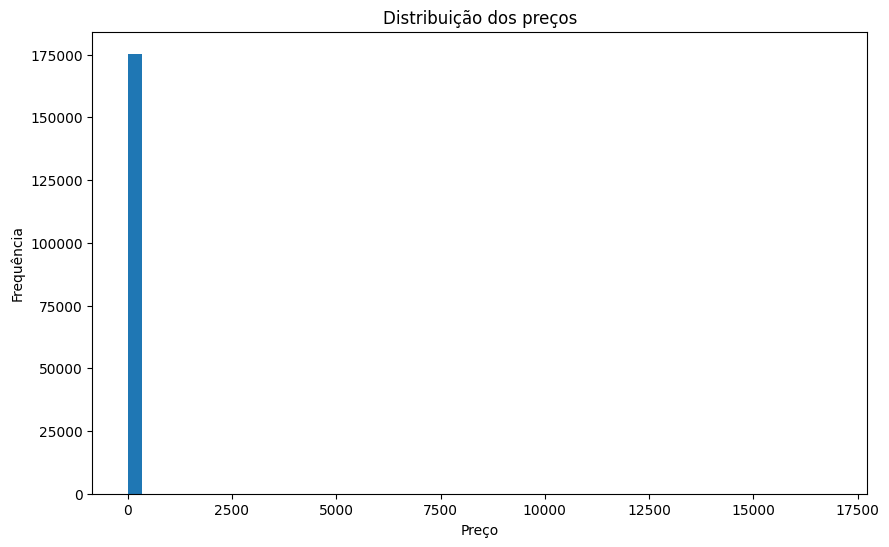

In [5]:
# Visualizar a distribuição dos dados
plt.figure(figsize=(10,6))
plt.hist(df['UnitPrice'], bins=50)
plt.title('Distribuição dos preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

In [6]:
# Identificar os produtos com maior potencial de crescimento
top_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

StockCode
84077     24716
21212     16771
85099B    15770
85123A    15000
22197     12318
22616     11779
84879     11218
22693     10318
22492      9848
21977      9361
Name: Quantity, dtype: int64


In [7]:
# Identificar as categorias com maior potencial de crescimento
top_categories = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_categories)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     24716
PACK OF 72 RETROSPOT CAKE CASES       16771
JUMBO BAG RED RETROSPOT               15770
WHITE HANGING HEART T-LIGHT HOLDER    15126
SMALL POPCORN HOLDER                  12318
PACK OF 12 LONDON TISSUES             11779
ASSORTED COLOUR BIRD ORNAMENT         11218
GROW A FLYTRAP OR SUNFLOWER IN TIN    10318
MINI PAINT SET VINTAGE                 9848
PACK OF 60 PINK PAISLEY CAKE CASES     9361
Name: Quantity, dtype: int64


In [8]:
# Separar os dados em treinamento e teste
X = df[['UnitPrice']]
y = df['Quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Avaliar o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

MSE: 158876.74


In [11]:
# Criar um novo dataframe com os dados de teste
new_data = pd.DataFrame({'UnitPrice': [10, 20, 30]})

# Fazer previsões com o modelo
new_pred = model.predict(new_data)

# Imprimir as previsões
print(f'Previsões: {new_pred}')

Previsões: [9.61198995 9.58176411 9.55153827]


In [13]:
# Análise de correlação
corr_matrix = df[['Quantity', 'UnitPrice']].corr()
print(corr_matrix)

           Quantity  UnitPrice
Quantity   1.000000  -0.001144
UnitPrice -0.001144   1.000000


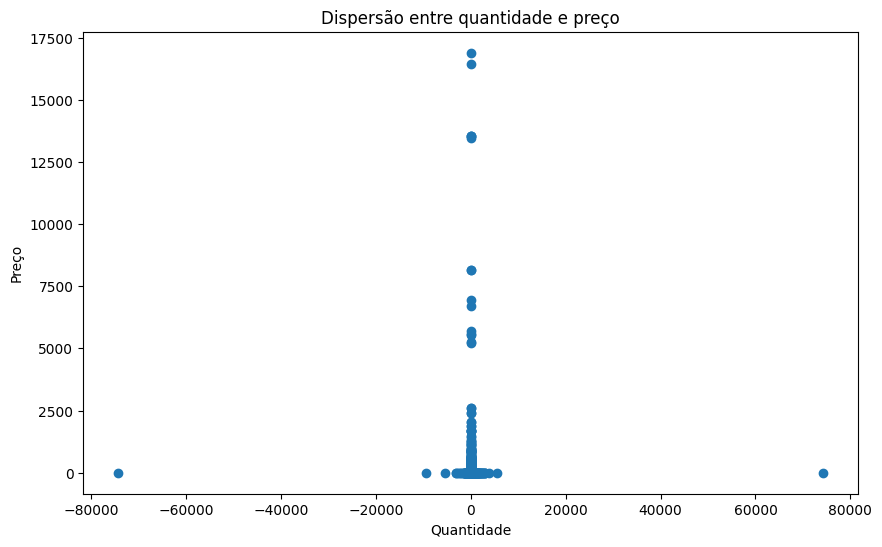

In [14]:
# Análise de dispersão
plt.figure(figsize=(10,6))
plt.scatter(df['Quantity'], df['UnitPrice'])
plt.title('Dispersão entre quantidade e preço')
plt.xlabel('Quantidade')
plt.ylabel('Preço')
plt.show()

**Quais são os produtos mais vendidos?**

In [35]:
# Agrupar os dados por StockCode e calcular a soma da Quantity
produtos_mais_vendidos = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

# Imprimir os resultados
print(produtos_mais_vendidos)

StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
21212     36039
23084     30646
22492     26437
22616     26315
21977     24753
Name: Quantity, dtype: int64


**Quais são os clientes mais leais?**

In [15]:
# Agrupar os dados por CustomerID e calcular a soma da InvoiceNo
clientes_mais_leais = df.groupby('CustomerID')['InvoiceNo'].count().sort_values(ascending=False).head(10)

# Imprimir os resultados
print(clientes_mais_leais)

CustomerID
17841.0    1555
14911.0    1281
14606.0    1247
12748.0    1110
15311.0    1083
14298.0     795
13089.0     792
15039.0     756
18118.0     633
14646.0     625
Name: InvoiceNo, dtype: int64


**Quais são as tendências de vendas ao longo do tempo?**

InvoiceDate
2010-12-31    342228
2011-01-31    308966
2011-02-28    277989
2011-03-31    351872
2011-04-30    289098
2011-05-31     38575
Freq: M, Name: Quantity, dtype: int64


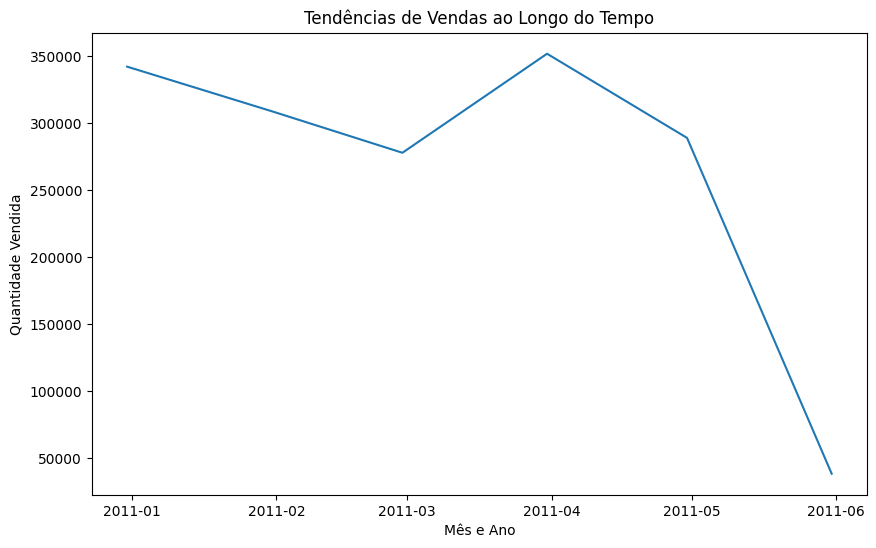

In [16]:
# Converter a coluna InvoiceDate para datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Agrupar os dados por mês e ano e calcular a soma da Quantity
tendencias_vendas = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Quantity'].sum()

# Imprimir os resultados
print(tendencias_vendas)

# Criar um gráfico de linha para visualizar os resultados
plt.figure(figsize=(10,6))
plt.plot(tendencias_vendas.index, tendencias_vendas.values)
plt.title('Tendências de Vendas ao Longo do Tempo')
plt.xlabel('Mês e Ano')
plt.ylabel('Quantidade Vendida')
plt.show()

**Análise de Vendas por País**

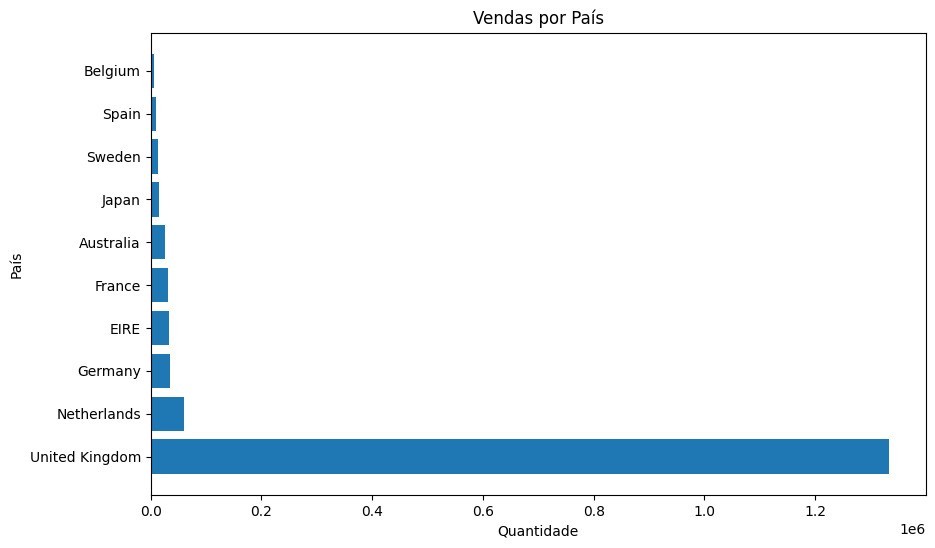

In [23]:
# Selecione os 10 países com mais vendas
vendas_por_pais = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

# Crie o gráfico de barras horizontal
plt.figure(figsize=(10,6))
plt.barh(vendas_por_pais.index, vendas_por_pais.values)
plt.title('Vendas por País')
plt.xlabel('Quantidade')
plt.ylabel('País')
plt.show()

**Previsão de Vendas**

In [18]:
# Separar os dados em treinamento e teste
X = df[['UnitPrice']]
y = df['Quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
previsoes = model.predict(X_test)

# Calcular o erro quadrático médio
mse = mean_squared_error(y_test, previsoes)

# Imprimir os resultados
print(f'Previsões: {previsoes}')
print(f'Erro Quadrático Médio: {mse:.2f}')


Previsões: [9.62936982 9.61214108 9.63901186 ... 9.63843757 9.61818625 9.63478024]
Erro Quadrático Médio: 158876.74
